# Document AI Invoice Parser and LLMs

---


This notebook shows you how use Document AI's specialized parsers, such as the Invoice parser, and query PDFs using LLMs.

Document AI has general OCR capabilities but also has a several specialized parsers for invoices, receipts, tax documents, mortgages, and much more. For the specialized parsers, Doc AI provides has a pre-defined schema for the elements it can extract from PDF/images which can be filtered by a confidence threshold for each entity.

Many business have mountains of unstructured data in the form of PDFs but extracting insights from them can be challenging. Additionally, many business need to provide customer service operations around these documents which requires manual effort.

One scenario where this could useful in a business context is when a customer calls and ask questions on their bill. As a company, an initial first step in the interaction with the customer could be offloaded via automated services. For example, imagine a customer calls a business which uses CCAI (CAI), the CCAI bot could handle questions/intents from the customer and potentially use this new combined service to retrieve the answer. This approach could be suitable when the entities in the documents haven't already been extracted into a structured format like a database.

Sample queries/questions look like this:
```
What is the total amount due on this invoice?
What is the purchase date on this invoice?
What was the total amount for the laptops on the invoice?
```

The innovation here is combining Doc AI to parse the invoice while the LLM can retrieve the answer for the customer via natural language interactions. One current limitation is trying this approach across many documents versus a a single doucument.

**Note** - to run this colab you will need access to the sample invoices and documentai API access for project.

Any questions about this demo should be directed to octo-aif@google.com

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import auth as google_auth
google_auth.authenticate_user()

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 0s (734 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.86.1-0ubuntu1.1_amd64.deb ...
Unpacking poppler-utils (0.86.1-0ubuntu1.1) ...
Setting up poppler-utils (0.86.1-0ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...


In [ ]:
!pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gsutil cp gs://vertex_sdk_llm_private_releases/SDK/google_cloud_aiplatform-1.23.0.llm.alpha.23.03.28-py2.py3-none-any.whl .
!pip install google_cloud_aiplatform-1.23.0.llm.alpha.23.03.28-py2.py3-none-any.whl "shapely<2.0.0"

Copying gs://vertex_sdk_llm_private_releases/SDK/google_cloud_aiplatform-1.23.0.llm.alpha.23.03.28-py2.py3-none-any.whl...
/ [1 files][  2.4 MiB/  2.4 MiB]                                                
Operation completed over 1 objects/2.4 MiB.                                      
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./google_cloud_aiplatform-1.23.0.llm.alpha.23.03.28-py2.py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.1
    Uninstalling shapely-2.0.1:
      Successfully uninstalled shapely-2.0.1
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully u

In [ ]:
# Install necessary Python libraries and restart your kernel after.
!pip install google-cloud-core==1.6.0
!pip install google-cloud-documentai==1.2.0
!pip install google-cloud-storage==1.36.2
!pip install simplejson


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.3.0
    Uninstalling cachetools-5.3.0:
      Successfully uninstalled cachetools-5.3.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.17.3
    Uninstalling google-auth-2.17.3:
      Successfully uninstalled google-auth-2.17.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.0
    Uninstalling google-api-core-2.11.0:
      Successfully uninstalled google-api-core-2.11.0
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 2.3.2
    Uninstalling google-cloud-core-2.3.2:
      Successfully uninstalled google-cloud-core-2.3.2
ERROR: pi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.1/137.1 kB 4.4 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: google-resumable-media
    Found existing installation: google-resumable-media 2.5.0
    Uninstalling google-resumable-media-2.5.0:
      Successfully uninstalled google-resumable-media-2.5.0
  Attempting uninstall: google-cloud-storage
    Found existing installation: google-cloud-storage 2.8.0
    Uninstalling google-cloud-storage-2.8.0:
      Successfully uninstalled google-cloud-storage-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
firebase-admin 5.3.0 requires google-cloud-storage>=1.37.1, but you have google-cloud-storage 1.36.2 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 4.2 MB/s eta 0:00:00


## Restart the runtime

In [ ]:
%%capture

import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

## Start demo from here

In [ ]:
from google.colab import drive
PDF_PATH = '/content/drive/MyDrive/GenAI Demos/Invoice Demo'

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.cloud import documentai_v1 as documentai
from PIL import Image, ImageDraw

import os
import pandas as pd
from IPython.display import display, Image
from pdf2image import convert_from_path, convert_from_bytes


Set your processor variables

In [ ]:
# TODO(developer): Fill these variables with your values before running the sample
PROJECT_ID = "ajarvis1-156916"
LOCATION = "us"  # Format is 'us' or 'eu'
PROCESSOR_ID = "3cef822fad4dceda"  # Create processor in Cloud Console


## Process the document and only add entities above an  adjustable confidence threshold.

In [ ]:
client_options = {"api_endpoint": "{}-documentai.googleapis.com".format(LOCATION)}
client = documentai.DocumentProcessorServiceClient(client_options=client_options)

def process_document_sample(file_path, confidence_threshold=0.6):
    # Instantiates a client

    # The full resource name of the processor, e.g.:
    # projects/project-id/locations/location/processor/processor-id
    # You must create new processors in the Cloud Console first
    name = f"projects/{PROJECT_ID}/locations/{LOCATION}/processors/{PROCESSOR_ID}"

    with open(file_path, "rb") as image:
        image_content = image.read()

    # Read the file into memory
    document = {"content": image_content, "mime_type": "application/pdf"}
    # document = {"content": image_content, "mime_type": "image/tiff"}

    # Configure the process request
    request = {"name": name, "raw_document": document}

    # Recognizes text entities in the PDF document
    result = client.process_document(request=request)
    document = result.document
    entities = document.entities
    print("Document processing complete.\n\n")

    # For a full list of Document object attributes, please reference this page: https://googleapis.dev/python/documentai/latest/_modules/google/cloud/documentai_v1beta3/types/document.html#Document
    types = []
    values = []
    confidence = []

    # Grab each key/value pair and their corresponding confidence scores.
    for entity in entities:
        if entity.confidence > confidence_threshold:
            types.append(entity.type_)
            values.append(entity.mention_text)
            confidence.append(round(entity.confidence,4))

    # Create a Pandas Dataframe to print the values in tabular format.
    df = pd.DataFrame({'Type': types, 'Value': values, 'Confidence': confidence})
    display(df)

    # if result.human_review_operation:
    #     print ("Triggered HITL long running operation: {}".format(result.human_review_operation))

    return document, df


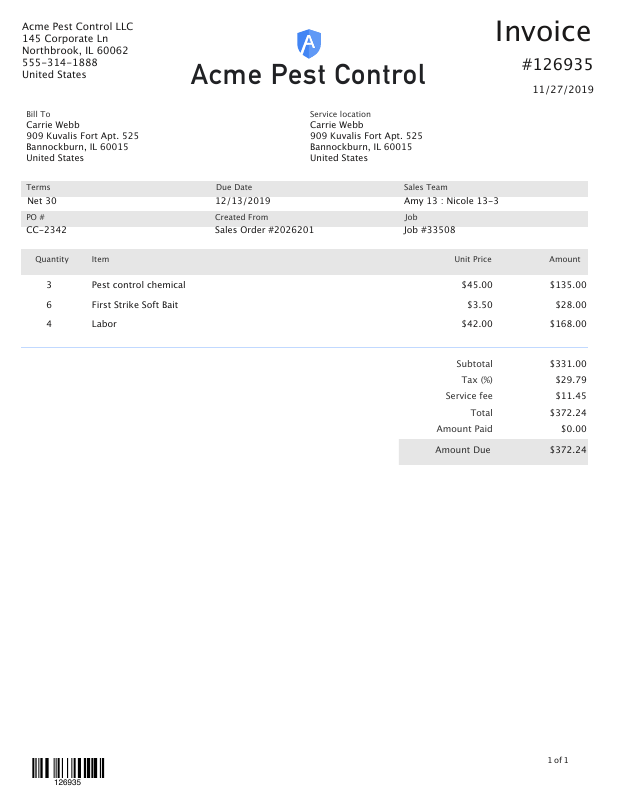

In [ ]:
images = convert_from_bytes(open(f'{PDF_PATH}/acme-sample-invoice.pdf', 'rb').read(), size=800)
display(images[0])

In [ ]:
doc, df = process_document_sample(f"{PDF_PATH}/acme-sample-invoice.pdf")

Document processing complete.




,Type,Value,Confidence
0,net_amount,331.00,0.9819
1,total_tax_amount,29.79,0.9508
2,invoice_date,11/27/2019,0.9441
3,due_date,12/13/2019,0.9382
4,receiver_name,Carrie Webb,0.9334
5,total_amount,372.24,0.9340
6,invoice_id,126935,0.9078
7,invoice_type,,0.7825
8,supplier_address,"145 Corporate Ln\nNorthbrook, IL 60062\n555-31...",0.7667
9,supplier_name,Acme Pest Control LLC,0.6501


In [ ]:
def get_invoice_text(df):
  df = df.drop(columns=['Confidence'])
  return df.to_csv(index=False, sep='\t')

In [ ]:
invoice_1 = get_invoice_text(df)

In [ ]:
invoice_1

'Type\tValue\nnet_amount\t331.00\ntotal_tax_amount\t29.79\ninvoice_date\t11/27/2019\ndue_date\t12/13/2019\nreceiver_name\tCarrie Webb\ntotal_amount\t372.24\ninvoice_id\t126935\ninvoice_type\t\nsupplier_address\t"145 Corporate Ln\nNorthbrook, IL 60062\n555-314-1888\nUnited States"\nsupplier_name\tAcme Pest Control LLC\npurchase_order\tCC-2342\nline_item\t3 Pest control chemical 45.00 135.00\nline_item\t6 First Strike Soft Bait 3.50 28.00\nline_item\t4 Labor 42.00 168.00\n'

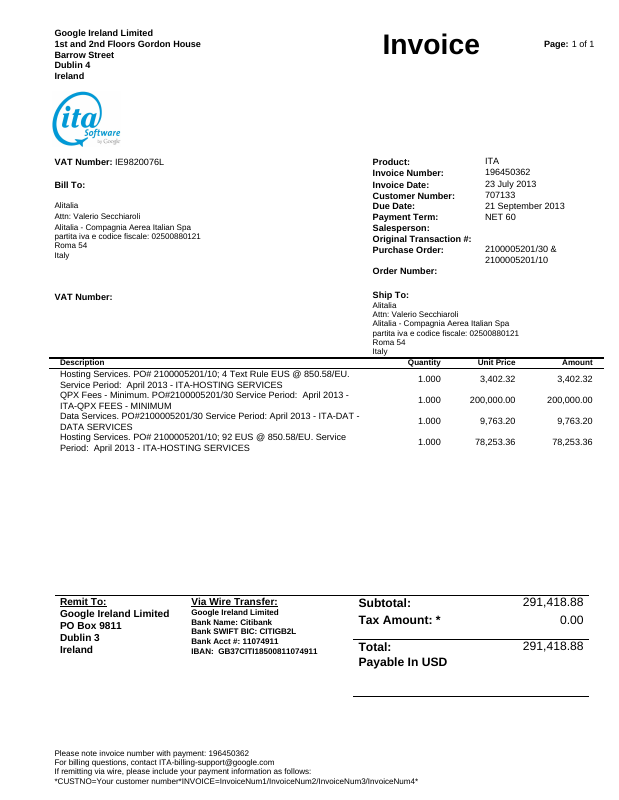

In [ ]:
images = convert_from_bytes(open(f'{PDF_PATH}/sample-invoice.pdf', 'rb').read(), size=800)
display(images[0])

In [ ]:
doc, df = process_document_sample(f"{PDF_PATH}/sample-invoice.pdf")
invoice_2 = get_invoice_text(df)
invoice_2

Document processing complete.




,Type,Value,Confidence
0,invoice_date,23 July 2013,0.9899
1,net_amount,"291,418.88",0.9843
2,total_tax_amount,0.00,0.9787
3,total_amount,"291,418.88",0.9697
4,due_date,21 September 2013,0.9448
5,invoice_id,196450362,0.9145
6,currency,USD,0.8651
7,receiver_name,Google Ireland Limited,0.7792
8,receiver_tax_id,IE9820076L,0.7699
9,remit_to_name,Google Ireland Limited,0.7577


'Type\tValue\ninvoice_date\t23 July 2013\nnet_amount\t291,418.88\ntotal_tax_amount\t0.00\ntotal_amount\t291,418.88\ndue_date\t21 September 2013\ninvoice_id\t196450362\ncurrency\tUSD\nreceiver_name\tGoogle Ireland Limited\nreceiver_tax_id\tIE9820076L\nremit_to_name\tGoogle Ireland Limited\npurchase_order\t2100005201/30\nreceiver_address\t"1st and 2nd Floors Gordon House\nBarrow Street\nDublin 4\nIreland"\ninvoice_type\t\nship_to_name\t"Alitalia\nAttn: Valerio Secchiaroli\nAlitalia Compagnia Aerea Italian Spa"\nline_item\t"1.000 3,402.32 3,402.32 1.000 200,000.00 200,000.00 Hosting Services. PO# 2100005201/10; 4 Text Rule EUS @ 850.58/EU.\nService Period: April 2013 - ITA-HOSTING SERVICES\nQPX Fees - Minimum. PO#2100005201/30 Service Period: April 2013 -\nITA-QPX FEES - MINIMUM\nData Services. PO#2100005201/30 Service Period: April 2013 - ITA-DAT -"\nline_item\tDATA SERVICES\nline_item\tHosting Services. PO# 2100005201/10; 92 EUS @ 850.58/EU. Service\nline_item\tPeriod: April 2013 - ITA-

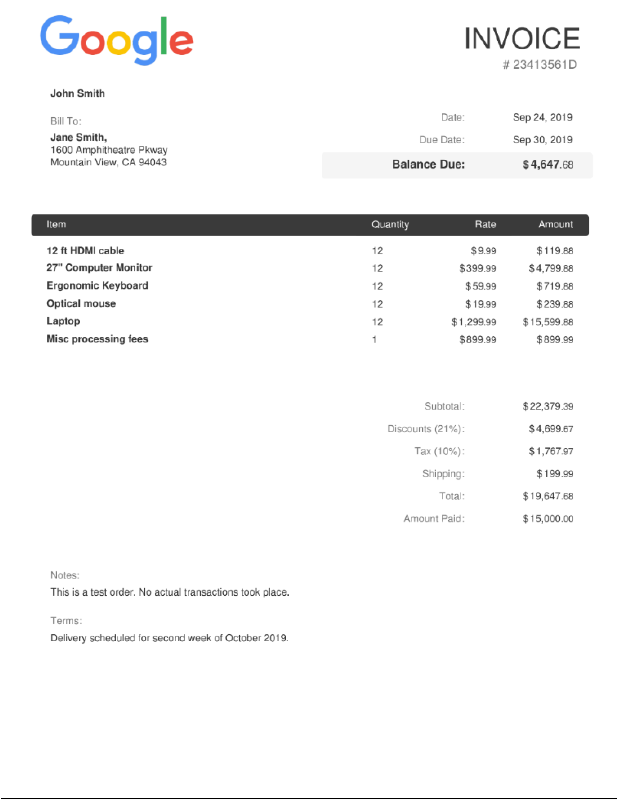

In [ ]:
images = convert_from_bytes(open(f'{PDF_PATH}/invoice.pdf', 'rb').read(), size=800)
display(images[0])

In [ ]:
doc, df = process_document_sample(f"{PDF_PATH}/invoice.pdf")
invoice_3 = get_invoice_text(df)

Document processing complete.




,Type,Value,Confidence
0,due_date,"Sep 30, 2019",0.9865
1,net_amount,"22,379.39",0.9872
2,total_amount,"19,647.68",0.9851
3,invoice_date,"Sep 24, 2019",0.9766
4,total_tax_amount,"1,767.97",0.9387
5,receiver_name,"Jane Smith,",0.8784
6,receiver_address,"1600 Amphitheatre Pkway\nMountain View, CA 94043",0.7679
7,invoice_id,23413561D,0.6043
8,line_item,9.99 12 12 ft HDMI cable 119.88,1.0000
9,line_item,"12 399.99 27"" Computer Monitor 4,799.88",1.0000


In [ ]:
# PROJECT_ID = "cloud-llm"  # @param {type:"string"}
# PROJECT_ID = "cloud-large-language-models"
MODEL_LOCATION =  "us-central1" # "europe-west4"  # @param {type:"string"}


In [ ]:
from google.cloud import aiplatform
from google.cloud.aiplatform.private_preview.language_models import TextGenerationModel

aiplatform.init(project=PROJECT_ID, location=MODEL_LOCATION)

In [ ]:
model = TextGenerationModel.from_pretrained("text-bison-001")


##Prompt: What is the total amount from this invoice?

In [ ]:
prompt = f"""
    Q: What is the total amount from this invoice:
    {invoice_1}
    A: The total amount is 372.24

    Q: What is the total amount from this invoice:
    {invoice_2}
    A: The total amount is 291,418.88

    Q: What is the total amount from this invoice:
    {invoice_3}
    A:

"""
print(model.predict(prompt))

The total amount is 19,647.68.


##Prompt: What is the purchase date from this invoice?

In [ ]:
prompt = f"""
    Q: What is the total amount from this invoice:
    {invoice_1}
    A: The total amount is 372.24

    Q: What is the total amount from this invoice:
    {invoice_2}
    A: The total amount is 291,418.88

    Q: What is the purchase date from this invoice:
    {invoice_3}
    A:

"""
print(model.predict(prompt))

The purchase date is Sep 24, 2019.


##Prompt: What is the cost of the laptops on this invoice?

In [ ]:
prompt = f"""
    Q: What is the total amount from this invoice:
    {invoice_1}
    A: The total amount is 372.24

    Q: What is the total amount from this invoice:
    {invoice_2}
    A: The total amount is 291,418.88

/////////////////////////////////    {invoice_3}
    A:

"""
print(model.predict(prompt))

The laptops cost 15,599.88.
